# Problema 6

In [1]:
import numpy as np
from timeit import default_timer
import matplotlib.pyplot as plt

def steepest_descent(A, b, x, tol= 1e-10, max_iter = False):

    x_k = x
    r_k = b - A @ x_k
    k = 0

    while np.linalg.norm(r_k) > tol :

        t_k = (r_k.T @ r_k) / (r_k.T @ A @ r_k)
        x_k = x_k + t_k * r_k
        r_k = r_k - t_k * A @ r_k
        
        if max_iter != False and k == max_iter:
            return Steepest_vector(x_k, k, r_k)

        k += 1

    return x_k, k, r_k

# Pregunta 9

Mediante la entrada de una matriz $M$, se escribio la funcion mypinv, la cual entrega la inversa de Moore Penrose de M a traves de la descomposición de valores singulares. Para solucionar el problema del error del punto flotante, se redondeo los valores de las matriz diagonal $S$ en 10 cifras, para evitar errores en el producto de la función.

In [2]:
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt
from numpy import linalg as la

def mypinv(M):
    #Se utiliza el comando SVD para obtener la descomposición SVD.
    U, S, V = linalg.svd(M, full_matrices=True)
    #Se creo una matriz nula de la misma dimension de la matriz M.
    smat = np.zeros(M.shape)
    #Los valores diagonales se llenan con los valores entregados en la matriz S de la SVD de M.
    for i in range(0, smat.shape[0]):
        for j in range(0, smat.shape[1]):
            if i==j:
                # Se redondea los valores diagonales de la matriz S para evitar el error del punto flotante.
                S[i] = round(S[i],12)
                if S[i]==0:
                    smat[i,i]=0
                else:
                    smat[i,i]=1/S[i]
    #Finalmente, obtenemos la inversa generalizada mediante el siguiente producto.                
    return V.transpose() @ smat.transpose() @ U.transpose()

La pseudoinversa de la primera matriz de $2.b$ esta dada por:

In [3]:
Matrix1 = np.array([[1,1],[0,0]])
mypinv(Matrix1)

array([[0.5, 0. ],
       [0.5, 0. ]])

La pseudoinversa de la segunda matriz de $2.b$ esta dada por:

In [4]:
Matrix2 = np.array([[1],[2]])
mypinv(Matrix2)

array([[0.2, 0.4]])

La pseudoinversa de la tercera matriz de $2.b$ esta dada por:

In [5]:
Matrix3 = np.array([[1,1,1],[2,2,2]])
mypinv(Matrix3)

array([[0.06666667, 0.13333333],
       [0.06666667, 0.13333333],
       [0.06666667, 0.13333333]])

# Pregunta 10

Primero, se define la función symmetric_mat($n$) que calcula matrices aleatorias de tamaño $n$.

In [6]:
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt
from numpy import linalg as la

def symmetric_mat(n): #n es el tamaño de la matriz cuadrada
    M=np.random.rand(n,n)
    return (M+M.transpose())/2

Se inserta un pequeño ejemplo, para observar como se desarrolla la función.

In [7]:
symmetric_mat(4)

array([[0.50572153, 0.85452579, 0.36221352, 0.37465917],
       [0.85452579, 0.17789742, 0.53337248, 0.37765893],
       [0.36221352, 0.53337248, 0.0848255 , 0.59960254],
       [0.37465917, 0.37765893, 0.59960254, 0.48223817]])

Luego, se definirá la función non_singular_mat($n$) que calcula una matriz invertible de tamaño $n$. Por la hint dada, se tiene que tenemos que transformarla en una matriz estrictamente dominante, pues esta es invertible. Para ello, se definirá la funcion generate_random_row($i,n$) el cual generara una fila que cumpla la condición de las matrices diagonalmente dominantes.

In [8]:
def generate_random_row(i,n): #funcion generadora de vector fila aleatorio
    M=np.random.rand(1,n)
    while M[0,i] <= np.sum(M)-M[0,i]: # negacion condicion necesaria para que sea diagonal dominante
        M=np.random.rand(1,n)
    return M
        
def non_singular_mat(n): #n es el tamaño de la matriz cuadrada
    M=np.random.rand(n,n)
    for i in range(0,n):
        diag=abs(M[i,i]) #valor de la matriz en (i,i)
        sum_value_nd=np.sum(abs(M[i]))-diag #suma de los valores absolutos de los elementos no diagonales
        if (diag <= sum_value_nd): # si no cumple la condicion necesaria, entonces
            M[i]=generate_random_row(i,n) #se genera una fila que si la cumpla
    return M

Se inserta un pequeño ejemplo, para observar como se desarrolla la función.

In [9]:
non_singular_mat(4)

array([[0.49614879, 0.05048539, 0.28599583, 0.10853916],
       [0.03303658, 0.57074886, 0.41651931, 0.05173864],
       [0.70286419, 0.03533768, 0.98832172, 0.09289156],
       [0.07818465, 0.19983981, 0.2770075 , 0.5687182 ]])

Luego, se definirá la función tri_mat($n$) que calcula una matriz triangular superior invertible de tamaño $n$. Para que esta matriz sea invertible, los valores diagonales tienen que ser distinto de cero y se tiene que cumplir $i\geq j$ donde $i,j$ detemnin la posicion de la matriz $M, m_{i,j}$

In [10]:
def tri_mat(n):
    M=np.random.rand(n,n)
    for i in range(0,n):
        for j in range(0,n):
            if i>j:
                M[i,j]=0  # condicion necesario para que sea triangular superior
        while M[i,i]==0: #condicion necesaria para que sea invertible
            M[i,i]=np.random.rand(1,1)
    return M

Se inserta un pequeño ejemplo, para observar como se desarrolla la función.

In [11]:
tri_mat(4)

array([[0.67873143, 0.12229954, 0.21599151, 0.41164892],
       [0.        , 0.91561183, 0.53233194, 0.50353131],
       [0.        , 0.        , 0.24970802, 0.52129516],
       [0.        , 0.        , 0.        , 0.03908804]])

# Problema 11

In [12]:
def my_gc(A,x,b,C,tol = 1e-5,maxiter = 1000):
    x=np.copy(x)
    r=b - A@x
    w=np.linalg.solve(C,r) # Calcula w=inv(C)*r. w=w0
    v=np.linalg.solve(C.T,w) # Calcula v=inv(transpose(C))*w. v=v0
    alfa=np.linalg.norm(w)**2
    k=0
    
    while k<=maxiter:
        if np.linalg.norm(v)<=tol:
            break
        u=A@v # u=Av_k
        t=alfa/(u.T@v) # t=t_k
        x+=t*v # x=x_k
        r-=t*u # r=r_k
        w=np.linalg.solve(C.T,r) # w=w_k
        beta=np.linalg.norm(w)**2 # beta=inner(w_k,w_k)
        if beta<tol:
            if np.linalg.norm(r)<tol:
                break
        s=beta/alfa #s=s_k
        v=np.linalg.solve(C.T,w)+s*v # Update v=v_(k+1)
        alfa=beta # Update alfa
        k+=1 # Update k
        
    if k>maxiter:
        return False
        
    return x, r, k

## a)

In [13]:
def mat2(n, tau):
    A = np.random.rand(n,n)*2-1
    A = (A + A.T)/2
    A[ np.abs(A) > tau] = 0
    A[np.eye(n) == 1] = 1
    return A

## b)

In [14]:
def test_b():
    times_gc = []
    times_np = []
    
    for n in range(100, 501):
        
        A = mat2(n, 0.05)
        b = (np.random.rand(n).T*2-1).reshape((n,1))
        
        start = default_timer()
        np.linalg.solve(A,b)
        end = default_timer()
        times_np.append(end-start)
        
        x_0 = np.ones((n,1))
        I = np.eye(n)
        
        start = default_timer()
        my_gc(A, x_0, b, I, 1e-12, n)
        end = default_timer()
        times_gc.append(end-start)
    return times_gc, times_np

In [15]:
cg_times, np_times = test_b()
cg_times = np.array(cg_times).reshape((401, 1))
np_times = np.array(np_times).reshape((401, 1))

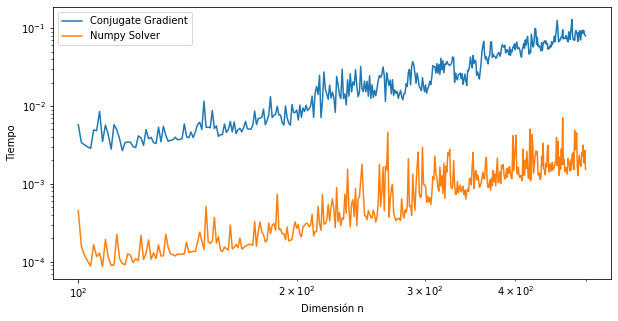

In [16]:
N = np.array([i for i in range(100, 501)]).reshape((401,1))
plt.figure(figsize = (10,5))
plt.loglog(N, cg_times, label= "Conjugate Gradient")
plt.loglog(N, np_times, label = "Numpy Solver")
plt.xlabel("Dimensión n")
plt.ylabel("Tiempo")
plt.legend()
plt.show()

Se observa que numpy tiene mejores tiempos que el algoritmo del gradiente conjugado. 

## c)

In [17]:
def test_c():
    r_s = []
    tau = [0.2, 0.1, 0.05, 0.01]
    x_0 = np.ones((500,1))
    I = np.eye(500)
    
    for t in tau:
        A = mat2(500, t)
        b = (np.random.rand(500).T*2-1).reshape((500,1))
        _, r, _ = my_gc(A, x_0, b, I, 1e-12, 10000)
        r_s.append(np.linalg.norm(r))
    return r_s, tau

In [18]:
r_s, tau = test_c()

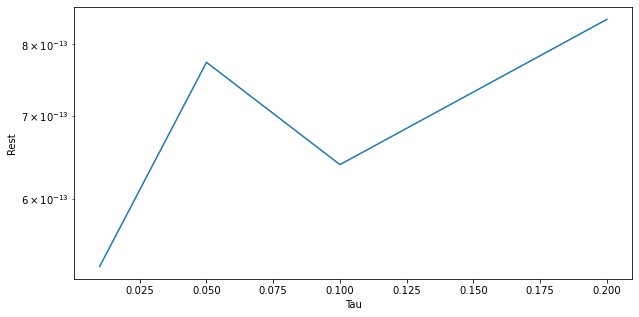

In [19]:
plt.figure(figsize = (10,5))
plt.semilogy(tau, r_s)
plt.xlabel("Tau")
plt.ylabel("Rest")
plt.show()

Se puede observar un aumento de los restos a medida que Tau aumenta, no son tantos datos como para sacar una conclusión certera, pero nos induce a pensar que a medida que la matriz de input, se diferencia cada vez más de la Identidad, la aproximación del algoritmo es cada vez peor.

# Problema 12

A continuación se modificarán los algoritmos para extraer cada paso de los solver.

In [20]:
def steepest_descent_modify(A, b, x, max_iter):
    dist_list = []
    k_list = []
    x_k = x
    r_k = b - A @ x_k
    k = 0

    while k <= max_iter:

        t_k = (r_k.T @ r_k) / (r_k.T @ A @ r_k)
        x_k = x_k + t_k * r_k
        r_k = r_k - t_k * A @ r_k
        
        if k != 0:
            dist_list.append( np.linalg.norm(b - A @ x_k) )
            
        k += 1

    return dist_list

def my_gc_modify(A, x, b, C, maxiter = 1000):
    r_k_list = []
    dist_list = []
    x=np.copy(x)
    r=b - A@x
    w=np.linalg.solve(C,r) # Calcula w=inv(C)*r. w=w0
    v=np.linalg.solve(C.T,w) # Calcula v=inv(transpose(C))*w. v=v0
    alfa=np.linalg.norm(w)**2
    k=0
    
    while k<=maxiter:
        u=A@v # u=Av_k
        t=alfa/(u.T@v) # t=t_k
        x+=t*v # x=x_k
        r-=t*u # r=r_k
        w=np.linalg.solve(C.T,r) # w=w_k
        beta=np.linalg.norm(w)**2 # beta=inner(w_k,w_k)
        s=beta/alfa #s=s_k
        v=np.linalg.solve(C.T,w)+s*v # Update v=v_(k+1)
        alfa=beta # Update alfa
        
        if k != 0:
            r_k_list.append( np.linalg.norm(r.T) )
            dist_list.append( np.linalg.norm(b - A @ x) )
        k+=1 # Update k
        
    return r_k_list, dist_list

In [21]:
A = np.diag([i for i in range(1,101)])
A[: -1, 1 :][np.eye(99) == 1], A[1 :, : -1][np.eye(99) == 1] = 1, 1
b = np.ones((100,1))
x_0 = np.ones_like(b)
I = np.eye(100)
K = np.array([i for i in range(1, 101)]).reshape((100,1))

In [22]:
dist_st = steepest_descent_modify(A, b, x_0, max_iter = 100)

r_gc, dist_gc = my_gc_modify(A, x_0, b, I, 100)
k_gc = [2 * (np.sqrt(k) - 1)**100 / (np.sqrt(k) + 1)**100 for k in range(1,101)]

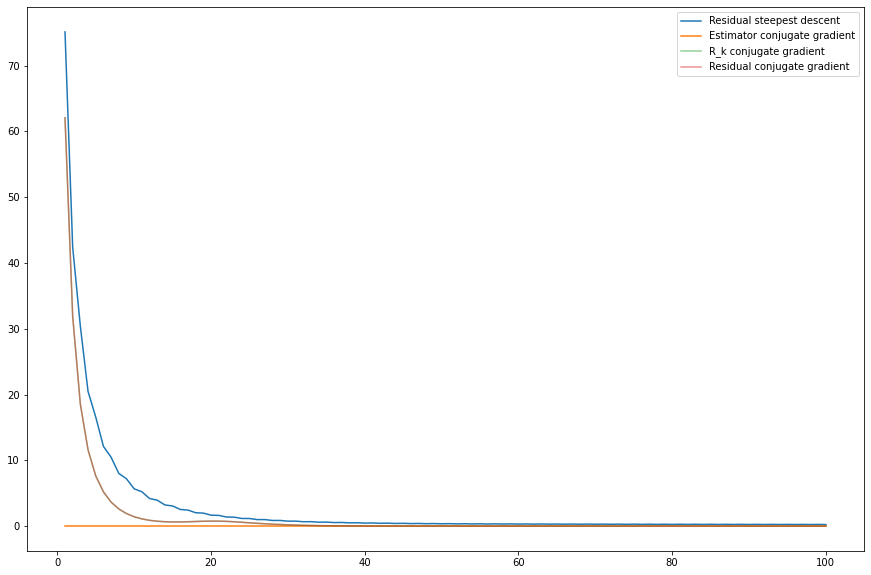

In [23]:
plt.figure(figsize = (15,10))
plt.plot(K, dist_st, label = "Residual steepest descent")
plt.plot(K, k_gc, label = "Estimator conjugate gradient")
plt.plot(K, r_gc, label = "R_k conjugate gradient", alpha = 0.5)
plt.plot(K, dist_gc, label = "Residual conjugate gradient", alpha = 0.5)
plt.legend()
plt.show()

Observamos que se cumple lo teórico de que $r_k$ es igual a $b-x_k$ y además observamos que el método del gradiente conjugado se aproxima más rápido que el médoto con el Steepest Descent.

# Pregunta 13 y 14

Primero, se definirá el metodo de las potencias, el cual se utilizará paraobtener el valor y vector dominante de alguna matriz dada.

In [33]:
import numpy as np

def my_pow(A,x,tol,N):
    
    lmb = 0. # lambda inicial
    k = 0 # contador de iteraciones
    err = 1. # error inicial (tomar valor grande)
    np.set_printoptions(suppress=True,precision=1000000000)
    while k<=N and err>tol:
        y = A@x.astype(float)
        # normaliza y
        indx=np.argmax(np.abs(y))
        c1 = y[indx,0].astype(float)
        dc = np.abs(lmb-c1)# distancia entre lambda^{(k)} y lambda^{(k+1)}
        y = (1/c1)*y
        # actualiza x y lambda (check para convergencia)
        dv = np.linalg.norm(x-y) # distancia entre V^{(k)} y V^{(k+1)}
        err = np.max([dc,dv]) # se toma el maximo de los errores
        x = y
        lmb=c1
        k+=1
    v=x.astype(float)
    
    return lmb,v,err,k

Junto con ello, se escribira la función que generara la matriz pedida en la pregunta 14 inciso b.

In [34]:
def generate_matriz(n):
    Matriz = np.zeros((n,n),dtype=float)
    for i in range(0,n):
        for j in range(0,n):
            if i==j:
                Matriz[i,j]=(i+1)+(j+1)
            else:
                Matriz[i,j]=(i+1)*(j+1)
    return Matriz
Matriz=generate_matriz(15)
print(Matriz)

[[  2.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
   15.]
 [  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.  28.
   30.]
 [  3.   6.   6.  12.  15.  18.  21.  24.  27.  30.  33.  36.  39.  42.
   45.]
 [  4.   8.  12.   8.  20.  24.  28.  32.  36.  40.  44.  48.  52.  56.
   60.]
 [  5.  10.  15.  20.  10.  30.  35.  40.  45.  50.  55.  60.  65.  70.
   75.]
 [  6.  12.  18.  24.  30.  12.  42.  48.  54.  60.  66.  72.  78.  84.
   90.]
 [  7.  14.  21.  28.  35.  42.  14.  56.  63.  70.  77.  84.  91.  98.
  105.]
 [  8.  16.  24.  32.  40.  48.  56.  16.  72.  80.  88.  96. 104. 112.
  120.]
 [  9.  18.  27.  36.  45.  54.  63.  72.  18.  90.  99. 108. 117. 126.
  135.]
 [ 10.  20.  30.  40.  50.  60.  70.  80.  90.  20. 110. 120. 130. 140.
  150.]
 [ 11.  22.  33.  44.  55.  66.  77.  88.  99. 110.  22. 132. 143. 154.
  165.]
 [ 12.  24.  36.  48.  60.  72.  84.  96. 108. 120. 132.  24. 156. 168.
  180.]
 [ 13.  26.  39.  52.  65.  78.  91. 104

Finalmente, se tiene el metodo de deflación Wielandt, el cual mediante la subrutina del metodo de las potencias, se tendran todos los valores y vectores propios.

In [ ]:
def deflation(n, A, ei_val, ei_vec, tol, N):
    for e in range(len(ei_vec)):
        if np.abs(ei_vec[e]) == np.max(abs(ei_vec)):
            i = e
            break
    b = np.zeros((n,n))
    if i != 0:
        for k in range(i-1):
            for j in range(i-1):
                b[k,j] = A[k,j]-v[k]*A[i,j]/v[i]
    if i != 1 and i != n-1:
        for k in range(i, n):
            for j in range(1, i):
                b[k, j] = a[k+1, j] - v[k+1]*A[i,j]/v[i]
                b[j, k] = a[j, k+1] - v[j]*A[i, k+1]/v[i]
    if i != n-1:
        for k in range(i, n):
            for j in range(i, n):
                b[k,j] = a[k+1, j+1] - v[k+1]*A[i, j+1]/v[i]
    

In [58]:
def Deflation(A):
    np.set_printoptions(suppress=False,precision=1000000000)
    x0 = np.ones((A.shape[0],1))
    lamb={}
    vec={}
    wec={}
    err={}
    k={}
    x={}
    Matrix={}
    for i in range(1,A.shape[0]+1):
        if i==1:
            Matrix[i]=A
            lamb[i], vec[i], err[i], k[i] = my_pow(Matrix[i],x0,1E-10,100)
            #print(lamb[i],"\n\n", vec[i],"\n\n")
            v=vec[i]
            M=Matrix[i]
            wec[i]=vec[i]
        else:
            max=0
            x[i] = M[0].transpose()/(lamb[i-1]*v[0])
            Matrix[i] = Matrix[i-1]-lamb[i-1]*wec[i-1]@x[i].transpose()
            lamb[i], vec[i], err[i], k[i] = my_pow(Matrix[i],x0,1E-10,100)
            wec[i] = vec[i]
            c=1
            d=0
            while c<i:
                vec[i]=(lamb[i]-lamb[i-c])*vec[i]+lamb[i-c]*wec[i-c]*(x[i-d].transpose()@vec[i])
                c=c+1
                d=d+1
            c=1
            d=0
            if i!=A.shape[0]:
                v=wec[i]
                M=Matrix[i]
            #print(lamb[i],"\n\n", vec[i],"\n\n")

In [59]:
Deflation(Matriz)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 15 is different from 1)

In [5]:
A1 = np.array([[1,2,-1],
            [1,0,1],  
            [4,-4,5]])
Deflation(A1)

3.0000000001835807 

 [[-0.24999999996940317]
 [ 0.25               ]
 [ 1.                 ]] 


1.9999999998776126 

 [[-2.000000000096269 ]
 [ 0.9999999999126885]
 [ 3.9999999997380655]] 


1.0 

 [[ 1.0000000001223872]
 [-0.9999999999999998]
 [-2.0000000000611933]] 


